# Heatmap/ST/JSD/cosine comparison

## Compare two heatmaps

In [738]:
import pandas as pd
from katlas.data import *
from katlas.plot import *
from katlas.pssm import *

In [739]:
cddm = pd.read_parquet('out/CDDM_pssms.parquet')

In [740]:
cddm.index = cddm.index.str.split('_').str[1]

In [741]:
pspa = Data.get_pspa_all_scale()

In [742]:
cddm = cddm[pspa.columns].copy()

In [743]:
pssm_df = recover_pssm(pspa.loc['PKACA'])

In [744]:
def plot_heatmap_simple(matrix, # a matrix of values
                 title: str='heatmap', # title of the heatmap
                 figsize: tuple=(6,7), # (width, height)
                 cmap: str='binary', # color map, default is dark&white
                 **kwargs, # arguments for sns.heatmap()
                 ):
    
    "Plot heatmap based on a matrix of values"
    
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, square=True,cmap=cmap, annot=False,**kwargs)
    plt.title(title)
    plt.ylabel('')
    plt.xlabel('')
    plt.yticks(rotation=0)

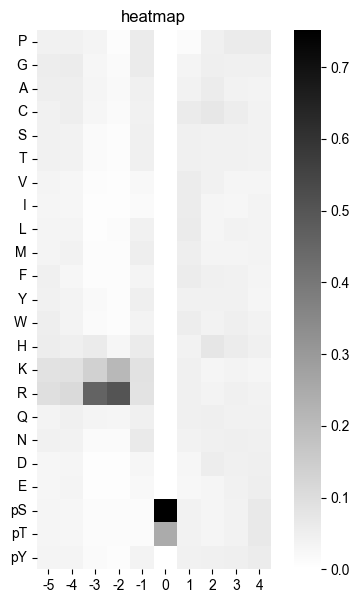

In [745]:
plot_heatmap_simple(pssm_df)

In [746]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

def plot_two_heatmaps(matrix1, matrix2, 
                      kinase_name="Kinase", 
                      figsize=(4,4.5), 
                      **kwargs):
    """
    Plot two side-by-side heatmaps with black rectangle borders,
    titles on top, shared kinase label below, and only left plot showing y-axis labels.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'wspace': 0.05})
    matrix1 = matrix1.drop(columns=0)
    matrix2 = matrix2.drop(columns=0)
    
    title1="CDDM"
    title2="PSPA"
    # Left heatmap (with y labels)
    sns.heatmap(matrix1, square=False, cmap="Reds", 
                # vmin=0, vmax=1,
                annot=False, cbar=False, ax=axes[0], **kwargs)
    axes[0].set_title(title1, fontsize=12, pad=10)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("")
    axes[0].tick_params(left=True, bottom=True)
    axes[0].tick_params(axis="y", rotation=0) 

    # Add rectangle border to left heatmap
    axes[0].add_patch(Rectangle((0,0), matrix1.shape[1], matrix1.shape[0], 
                                fill=False, edgecolor='black', lw=1.5))

    # Right heatmap (no y labels)
    sns.heatmap(matrix2, square=False, cmap="Blues", 
                # vmin=0, vmax=1,
                annot=False, cbar=False, ax=axes[1], **kwargs)
    axes[1].set_title(title2, fontsize=12, pad=10)
    axes[1].set_xlabel("")
    axes[1].set_ylabel("")
    axes[1].tick_params(left=False, labelleft=False, bottom=True)
    axes[1].tick_params(axis="y", rotation=0) 

    # Add rectangle border to right heatmap
    axes[1].add_patch(Rectangle((0,0), matrix2.shape[1], matrix2.shape[0], 
                                fill=False, edgecolor='black', lw=1.5))

    # Make y tick horizontal
    axes[0].set_title(title1, fontsize=12, pad=0)
    axes[1].set_title(title2, fontsize=12, pad=0)

    # force display every position
    # n_positions = matrix1.shape[1]
    # axes[0].set_xticks(np.arange(n_positions) + 0.5)   # center of each cell
    # axes[0].set_xticklabels(range(-5, 5), rotation=0)  # or your custom labels
    
    # axes[1].set_xticks(np.arange(n_positions) + 0.5)
    # axes[1].set_xticklabels(range(-5, 5), rotation=0)

    xpos = (list(matrix1.columns).index(-1) + list(matrix1.columns).index(1)) / 2 + 0.5
    axes[0].axvline(xpos, color='black', lw=0.75)
    axes[1].axvline(xpos, color='black', lw=0.75)

    # set empty xticks
    axes[0].set_xticks([])
    axes[1].set_xticks([])

    # Shared kinase label below
    fig.suptitle(kinase_name, fontsize=14, x=0.52,y=0.95)


In [747]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

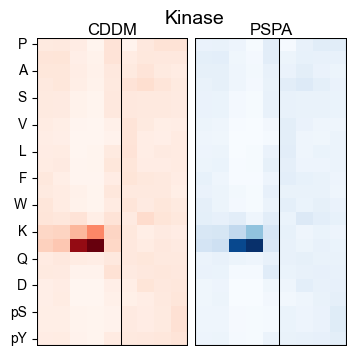

In [748]:
plot_two_heatmaps(pssm_df,pssm_df,figsize=(4,4))

In [749]:
def plot_compare(cddm_df,pspa_df,kinase,**kwargs):
    cddm_pssm = recover_pssm(cddm_df.loc[kinase])
    pspa_pssm = recover_pssm(pspa_df.loc[kinase])
    plot_two_heatmaps(cddm_pssm,pspa_pssm,kinase_name=kinase,**kwargs)

In [750]:
k_list = ['PKACA','AMPKA1','DYRK2','ATR','CK1A','EGFR']

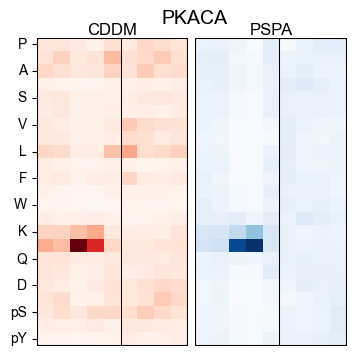

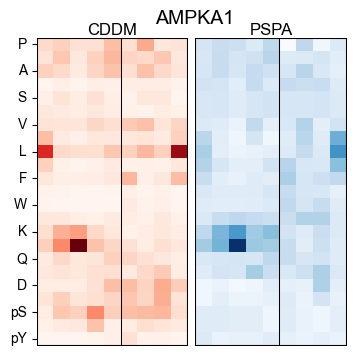

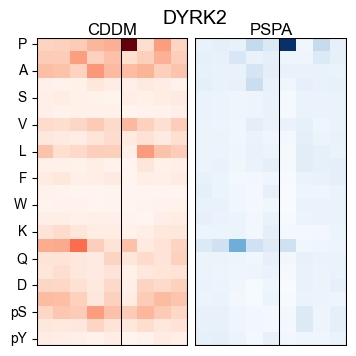

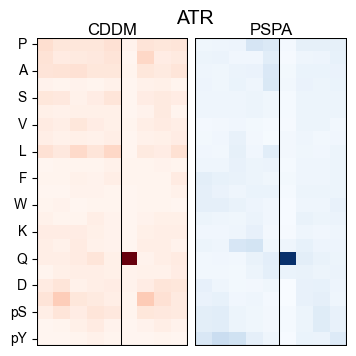

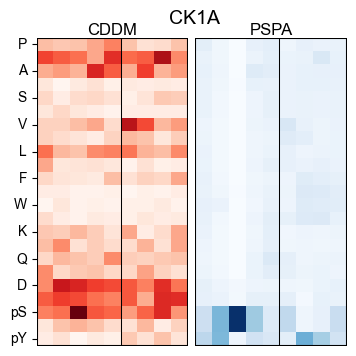

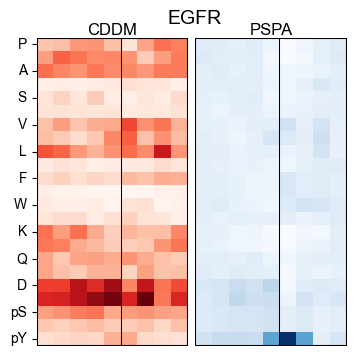

In [751]:
for k in k_list:
    plot_compare(cddm,pspa,k,figsize=(4,4))
    # plt.show()
    save_svg(f'fig/compare_{k}.svg')
    # plt.close()

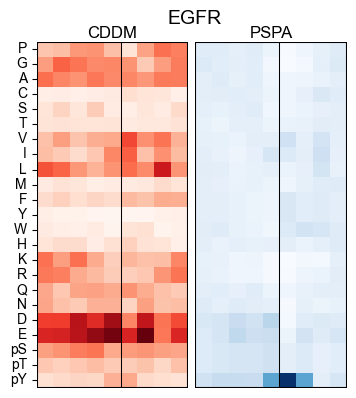

In [752]:
plot_compare(cddm,pspa,'EGFR')

## Cbar

In [753]:
import matplotlib as mpl

In [754]:
def plot_cbar(figsize=(5,0.3)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Shared normalization [0,1]
    norm = mpl.colors.Normalize(vmin=0, vmax=1)

    # Red probability bar
    cmap_red = plt.cm.Reds
    cb1 = mpl.colorbar.ColorbarBase(
        axes[0], cmap=cmap_red, norm=norm,
        orientation='horizontal'
    )
    # cb1.set_label("Probability")
    cb1.set_ticks([0, 0.5, 1])

    # Blue probability bar
    cmap_blue = plt.cm.Blues
    cb2 = mpl.colorbar.ColorbarBase(
        axes[1], cmap=cmap_blue, norm=norm,
        orientation='horizontal'
    )
    # cb2.set_label("Probability")
    cb2.set_ticks([0, 0.5, 1])

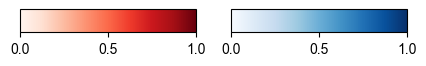

In [134]:
plot_cbar()
save_svg('fig/cbar.svg')

## ST ratio comparison

In [755]:
pspa_st = pspa[pspa['0pY']==0]

In [756]:
pspa_st_ratio = np.log2(pspa_st['0pS']/pspa_st['0pT'])

In [757]:
cddm_st_ratio = np.log2(cddm['0pS']/cddm['0pT'])

In [758]:
st_ratio = pd.concat([pspa_st_ratio,cddm_st_ratio],axis=1)

In [759]:
st_ratio.columns=['pspa','cddm']

In [760]:
info = Data.get_kinase_info()

info = info[info.pseudo=='0'].copy()

hue_group = info.set_index('kinase')['modi_group']

In [761]:
st_ratio['group'] = st_ratio.index.map(hue_group)

In [762]:
st_ratio = st_ratio.dropna()

In [763]:
from katlas.plot import *

/Users/icai/git/katlas/katlas/plot.py:653: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  if hue is not None:


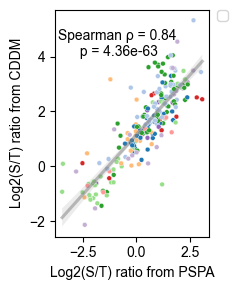

In [764]:
plt.figure(figsize=(2.5,3))
plot_corr(st_ratio,y='cddm',x='pspa',hue='group',s=12,
          text_location=(0.4,0.85),
          palette=group_color,legend=False)
plt.ylabel('Log2(S/T) ratio from CDDM')
plt.xlabel('Log2(S/T) ratio from PSPA')
plt.tight_layout()
save_svg('fig/ST_ratio.svg')

## JS divergence

In [765]:
from katlas.clustering import *

from functools import partial

In [766]:
((cddm_overlap==0).sum(1)/cddm_overlap.shape[1]).sort_values()

index
YES1        0.086957
GSK3B       0.086957
EPHB3       0.086957
BMX         0.086957
MAPKAPK3    0.086957
              ...   
CAMK1B      0.360870
SMMLCK      0.360870
BRAF        0.360870
VRK1        0.365217
GAK         0.365217
Length: 311, dtype: float64

In [767]:
import numpy as np
def js_divergence(p1, # pssm 
                  p2, # pssm
                 ):
    "p1 and p2 are two arrays (df or np) with index as aa and column as position"
    assert p1.shape==p2.shape
    valid = (p1 + p2) > 0
    p1 = np.where(valid, p1, 0.0)
    p2 = np.where(valid, p2, 0.0)
    
    m = 0.5 * (p1 + p2)
    
    js = 0.5 * np.sum(p1 * np.log((p1+ EPSILON) / (m + EPSILON)), axis=0) + \
         0.5 * np.sum(p2 * np.log((p2+ EPSILON) / (m + EPSILON)), axis=0)
    return js

In [768]:
common_k = list(set(pspa.index)&set(cddm.index))

In [769]:
score = pd.DataFrame(index=common_k)

In [770]:
score['pspa_speci'] = pspa_overlap.apply(get_specificity_flat,axis=1)

score['group'] = score.index.map(hue_group)

In [771]:
pspa_overlap = pspa.loc[common_k].copy()
cddm_overlap = cddm.loc[common_k].copy()

In [772]:
def cosine_similarity_position(pssm1: pd.DataFrame, pssm2: pd.DataFrame):
    """Compute cosine similarity per position between two PSSMs, no sklearn."""
    assert pssm1.shape == pssm2.shape, "PSSMs must have same shape"
    sims = {}
    for pos in pssm1.columns:
        v1 = pssm1[pos].values
        v2 = pssm2[pos].values
        dot = np.dot(v1, v2)
        norm1 = np.linalg.norm(v1)
        norm2 = np.linalg.norm(v2)
        sims[pos] = dot / (norm1 * norm2) if norm1 > 0 and norm2 > 0 else 0.0
    return pd.Series(sims)

In [774]:
# def euclidean_distance_position(pssm1: pd.DataFrame, pssm2: pd.DataFrame):
#     """Compute Euclidean distance per position between two PSSMs, no sklearn."""
#     assert pssm1.shape == pssm2.shape, "PSSMs must have same shape"
#     dists = {}
#     for pos in pssm1.columns:
#         v1 = pssm1[pos].values
#         v2 = pssm2[pos].values
#         diff = v1 - v2
#         dists[pos] = np.linalg.norm(diff)  # sqrt(sum((v1 - v2)^2))
#     return pd.Series(dists)

In [ ]:
def cosine_mean(cddm_pssm,pspa_pssm): return cosine_similarity_position(cddm_pssm,pspa_pssm).mean()
# def cosine_min(cddm_pssm,pspa_pssm): return cosine_similarity_position(cddm_pssm,pspa_pssm).min()
# def euclidean_mean(cddm_pssm,pspa_pssm): return euclidean_distance_position(cddm_pssm,pspa_pssm).mean()

In [456]:
# score_list = []
# for k in common_k:
#     pspa_pssm = recover_pssm(pspa.loc[k])
#     cddm_pssm = recover_pssm(cddm.loc[k])
#     score_list.append(euclidean_mean(pspa_pssm,cddm_pssm))
# score['euclidean_mean'] = score_list

In [457]:
score_list = []
for k in common_k:
    pspa_pssm = recover_pssm(pspa.loc[k])
    cddm_pssm = recover_pssm(cddm.loc[k])
    score_list.append(cosine_mean(pspa_pssm,cddm_pssm))
score['cosine_mean'] = score_list

In [522]:
score_list = []
for k in common_k:
    pspa_pssm = recover_pssm(pspa.loc[k])
    cddm_pssm = recover_pssm(cddm.loc[k])
    score_list.append(js_divergence(pspa_pssm,cddm_pssm).mean())
score['JSD_mean'] = score_list

In [458]:
# score_list = []
# for k in common_k:
#     pspa_pssm = recover_pssm(pspa.loc[k])
#     cddm_pssm = recover_pssm(cddm.loc[k])
#     score_list.append(cosine_min(pspa_pssm,cddm_pssm))
# score['cosine_min'] = score_list

In [468]:
from adjustText import adjust_text
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr


def plot_corr(
    df,  # dataframe that contains data
    x,  # x axis values, or colname of x axis
    y,  # y axis values, or colname of y axis
    text_location=(0.8, 0.1),  # relative coords in Axes (0–1)
    method="spearman",  # correlation method: 'pearson' or 'spearman'
    index_list=None,  # list of indices to annotate
    hue=None,
    reg_line=True,
    **kwargs
):
    """
    Given a dataframe and the name of two columns, 
    plot the two columns' correlation with either Pearson or Spearman.
    Annotate points if their index is in index_list.
    """
    x_vals = df[x]
    y_vals = df[y]

    # Compute correlation
    if method.lower() == "spearman":
        corr_val, pvalue = spearmanr(x_vals, y_vals)
        corr_label = f"Spearman ρ = {corr_val:.2f}\n p = {pvalue:.2e}"
    else:
        corr_val, pvalue = pearsonr(x_vals, y_vals)
        corr_label = f"Pearson r = {corr_val:.2f}\n p = {pvalue:.2e}"

    # Plot regression line + scatter
    if hue is not None:
        sns.scatterplot(data=df, x=x, y=y, hue=hue, **kwargs)
        if reg_line: sns.regplot(x=x_vals, y=y_vals, scatter=False, line_kws={'color': 'gray','alpha': 0.5})
        plt.legend(
            bbox_to_anchor=(1.05, 1),   # (x, y) anchor relative to axes
            loc="upper left",           # where to attach the legend box
            borderaxespad=0.
        )
    else:
        sns.regplot(x=x_vals, y=y_vals, line_kws={'color': 'gray'}, **kwargs)


    # # Add correlation text
    # plt.text(
    #     x=text_location[0],
    #     y=text_location[1],
    #     s=corr_label,
    #     transform=plt.gca().transAxes,
    #     ha="center",
    #     va="center"
    # )

    # Annotate selected points if index_list is given
    texts = []
    if index_list is not None:
        for idx in index_list:
            if idx in df.index:  # make sure index exists
                texts.append(
                    plt.text(
                        x_vals.loc[idx], 
                        y_vals.loc[idx], 
                        str(idx),
                        fontsize=9,
                        ha="center",
                        va="center"
                    )
                )
        if texts:
            adjust_text(texts, arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

In [723]:
def plot_bar(df, 
             value, # colname of value
             group, # colname of group
             title = None,
             figsize = (12,5),
             fontsize=14,
             dots = True, # whether or not add dots in the graph
             rotation=90,
             ascending=False,
             ymin=None,
             **kwargs
              ):
    
    "Plot bar graph from unstacked dataframe; need to indicate columns of values and categories"
    
    plt.figure(figsize=figsize)
    
    idx = df.groupby(group)[value].mean().sort_values(ascending=ascending).index
    
    sns.barplot(data=df, x=group, y=value, order=idx,hue=group, legend=False, **kwargs)
    
    if dots:
        marker = {'marker': 'o', 
                  'color': 'white', 
                  'edgecolor': 'black', 
                  'linewidth': 1.5, 
                  'jitter':True,
                  's': 5}

        sns.stripplot(data=df, 
                      x=group, 
                      y=value,
                      order=idx,
                      alpha=0.8,
                      # ax=g.ax,
                      **marker)
        
    # Increase font size for the x-axis and y-axis tick labels
    plt.tick_params(axis='x', labelsize=fontsize)  # Increase x-axis label size
    plt.tick_params(axis='y', labelsize=fontsize)  # Increase y-axis label size
    
    # Modify x and y label and increase font size
    plt.xlabel('', fontsize=fontsize)
    plt.ylabel(value, fontsize=fontsize)
    
    # Rotate X labels
    plt.xticks(rotation=rotation)
    
    # Plot titles
    if title is not None:
        plt.title(title,fontsize=fontsize)

    if ymin is not None: plt.ylim(bottom=ymin)
    plt.gca().spines[['right', 'top']].set_visible(False)

In [716]:
hue_subfamily=info.set_index('kinase')['subfamily']

In [727]:
group_color2 = pd.DataFrame(group_color).T

In [730]:
group_color2 = group_color2.reset_index(names='modi_group')

In [732]:
subfamily_color = info[['modi_group','subfamily']].merge(group_color2).drop(columns=['modi_group']).set_index('subfamily')

In [733]:
subfamily_color = subfamily_color.apply(tuple, axis=1).to_dict()

In [717]:
score['subfamily'] = score.index.map(hue_subfamily)

Text(0, 0.5, 'Mean cosine similarity (↑)')

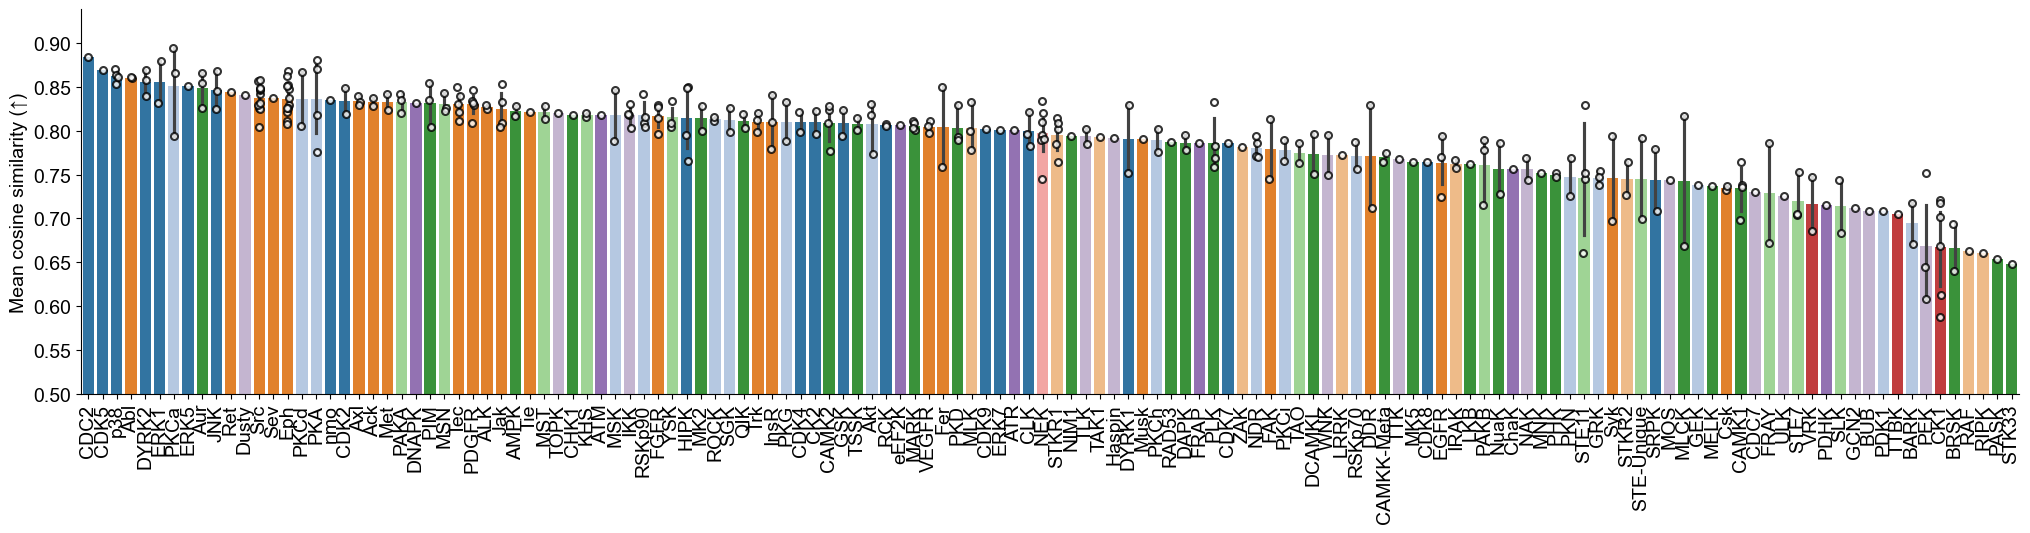

In [737]:
plot_bar(score,'cosine_mean','subfamily',
         palette=subfamily_color,
         ymin=0.5,figsize=(25,5)
        )
plt.ylabel('Mean cosine similarity (↑)')

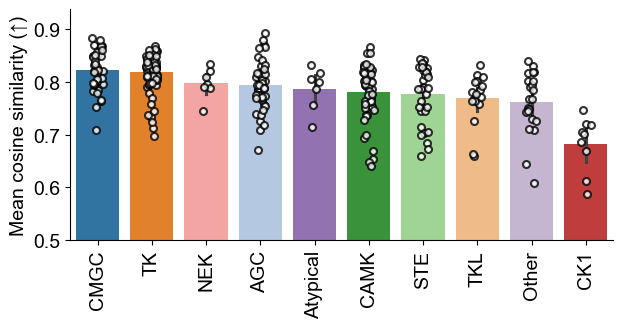

In [551]:
plot_bar(score,'cosine_mean','group',palette=group_color,ymin=0.5,figsize=(7,3))
plt.ylabel('Mean cosine similarity (↑)')
save_svg('fig/cosine.svg')

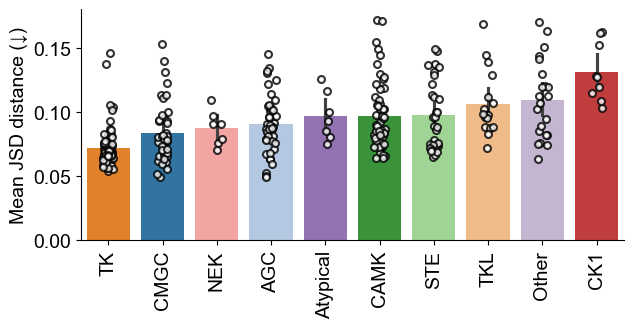

In [550]:
plot_bar(score,'JSD_mean','group',palette=group_color,figsize=(7,3),ascending=True)
plt.ylabel('Mean JSD distance (↓)')
save_svg('fig/JSD.svg')

In [531]:
plot_bar

<function katlas.plot.plot_bar(df, value, group, title=None, figsize=(12, 5), fontsize=14, dots=True, rotation=90, ascending=False, *, data=None, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None)>

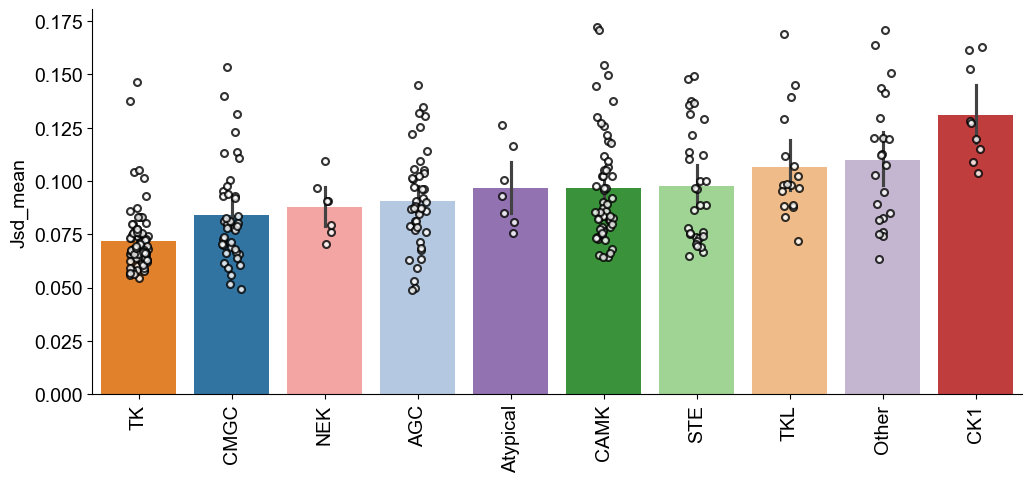

In [532]:
plot_bar(score,'JSD_mean','group',ascending=True,palette=group_color,)

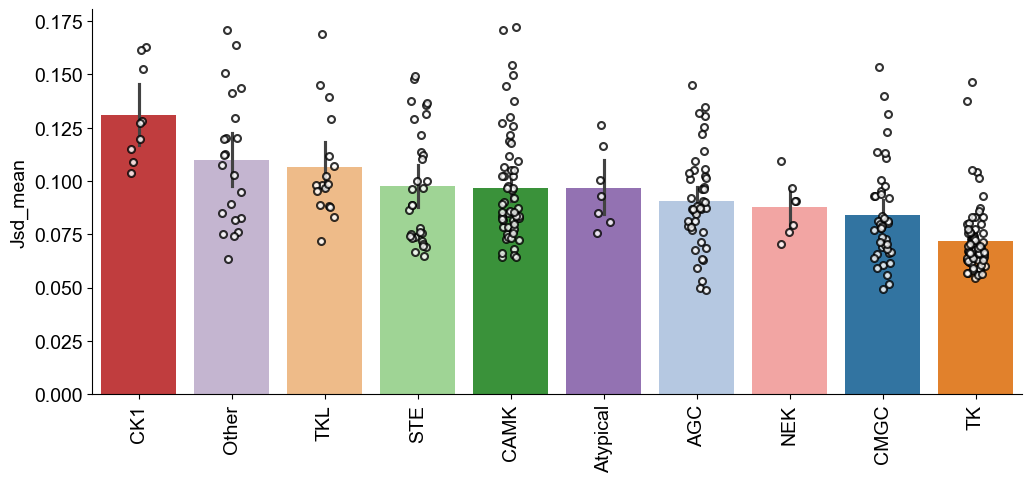

In [523]:
plot_bar(score,'JSD_mean','group',palette=group_color)

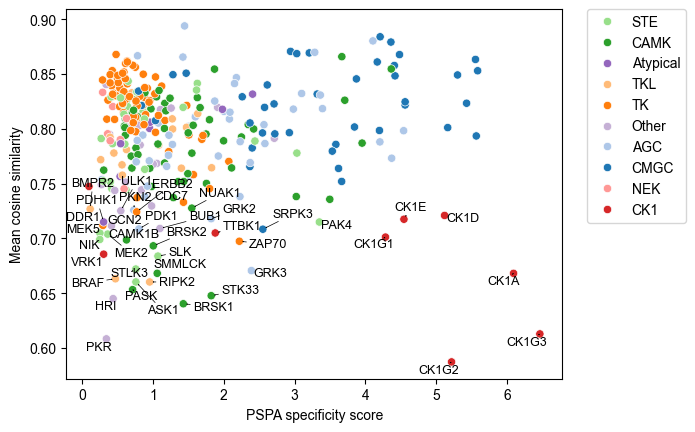

In [556]:
k_list = score['cosine_mean'].sort_values().head(40).index
# k_list = score[score['cosine_mean']<0.75].index
plot_corr(score,'pspa_speci','cosine_mean',
          text_location=(0.8,0.9),
          index_list=k_list,
          reg_line=False,
          hue='group',palette=group_color)
plt.ylabel('Mean cosine similarity')
plt.xlabel('PSPA specificity score')
save_svg('fig/cosine_similarity_specificity.svg')
# plt.axhline(y=0.75,color='r', linestyle='--', linewidth=2,alpha=0.2)

## Experiment

In [331]:
k='ATR'
pspa_pssm = recover_pssm(pspa.loc[k])
cddm_pssm = recover_pssm(cddm.loc[k])
js_divergence(pspa_pssm,cddm_pssm)

array([0.14273914, 0.12959633, 0.08697435, 0.05695579, 0.05958804,
       0.02867595, 0.2633553 , 0.10621596, 0.0445805 , 0.08671556])

In [507]:
cddm_pssm = recover_pssm(cddm.loc['GSK3B'])
pspa_pssm = recover_pssm(pspa.loc['GSK3B'])

In [508]:
cddm_pssm[1]

aa
P     0.420290
G     0.075362
A     0.039130
C     0.007246
S     0.015942
T     0.018841
V     0.063768
I     0.031884
L     0.046377
M     0.007246
F     0.013043
Y     0.007246
W     0.002899
H     0.008696
K     0.014493
R     0.057971
Q     0.024638
N     0.007246
D     0.034783
E     0.023188
pS    0.037681
pT    0.021739
pY    0.020290
Name: 1, dtype: float64

In [503]:
pspa_pssm[1]

aa
P     0.03262
G     0.03084
A     0.03382
C     0.03616
S     0.03246
T     0.03246
V     0.03149
I     0.03544
L     0.03455
M     0.03246
F     0.03358
Y     0.03173
W     0.02931
H     0.02956
K     0.03076
R     0.03930
Q     0.28018
N     0.04421
D     0.02762
E     0.02778
pS    0.03213
pT    0.03213
pY    0.02940
Name: 1, dtype: float64

Both PSPA and CDDM have Q as max in position 1.

Let's test which distance/similarity metric makes sense most

In [509]:
euclidean_distance_position(cddm_pssm,pspa_pssm)

-5    0.117948
-4    0.209271
-3    0.141432
-2    0.155427
-1    0.159968
 0    0.229537
 1    0.363615
 2    0.165754
 3    0.155656
 4    0.397584
dtype: float64

In [511]:
pd.Series(js_divergence(cddm_pssm,pspa_pssm),index=list(range(-5,5)))

-5    0.046637
-4    0.086952
-3    0.063191
-2    0.062703
-1    0.072525
 0    0.027765
 1    0.132643
 2    0.075066
 3    0.062533
 4    0.172927
dtype: float64

In [512]:
cosine_similarity_position(cddm_pssm,pspa_pssm)

-5    0.868829
-4    0.713273
-3    0.843677
-2    0.808220
-1    0.790774
 0    0.950192
 1    0.596159
 2    0.774477
 3    0.795978
 4    0.793016
dtype: float64

In [513]:
cosine_similarity_position(cddm_pssm,pspa_pssm).mean()

np.float64(0.7934594439218537)

Only cosine shows position 1 similar, while JS divergence and euclidean distance emphasize the difference in position 1.